In [9]:
import matplotlib.pyplot as plt
from datetime import datetime

In [10]:
def parse_training_data(file_path):
    try:
        with open(file_path, 'r') as file:
            # Read the content of the file
            file_content = file.readlines()

            time_list = []
            loss_list = []
            eval_loss_list = []

            for line in file_content:
                try:
                    entry = eval(line)  # Evaluate the string as a Python expression
                    if 'epoch' in entry:
                        # Assuming 'epoch' values are already in seconds
                        epoch_time = entry['epoch']
                        time_list.append(epoch_time)
                        loss_list.append(entry.get('loss', 0))
                        eval_loss_list.append(entry.get('eval_loss', 0))
                except (SyntaxError, ValueError):
                    # Ignore lines that are not valid Python dictionaries
                    pass

    except FileNotFoundError:
        print(f"The file '{file_path}' does not exist.")
        epochs = []
        evals = []
    except Exception as e:
        print(f"An error occurred: {e}")
        epochs = []
        evals = []

    result = [(value, eval_loss_list[i]) for i, value in enumerate(time_list) if eval_loss_list[i] != 0]
    epochs, evals = zip(*result)

    return epochs, evals

In [12]:
epochs_5088823, evals_5088823 = parse_training_data("../LUMI/logs/train/baseline/5088823.output")
epochs_5088840, evals_5088840 = parse_training_data("../LUMI/logs/train/baseline/5088840.output")
epochs_5268102, evals_5268102 = parse_training_data("../LUMI/logs/train/baseline/5268102.output")
epochs_5268209, evals_5268209 = parse_training_data("../LUMI/logs/train/baseline/5268209.output")
epochs_5268210, evals_5268210 = parse_training_data("../LUMI/logs/train/baseline/5268210.output")
epochs_5268413, evals_5268413 = parse_training_data("../LUMI/logs/train/baseline/5268413.output")
epochs_5268419, evals_5268419 = parse_training_data("../LUMI/logs/train/baseline/5268419.output")
epochs_5268420, evals_5268420 = parse_training_data("../LUMI/logs/train/baseline/5268420.output")

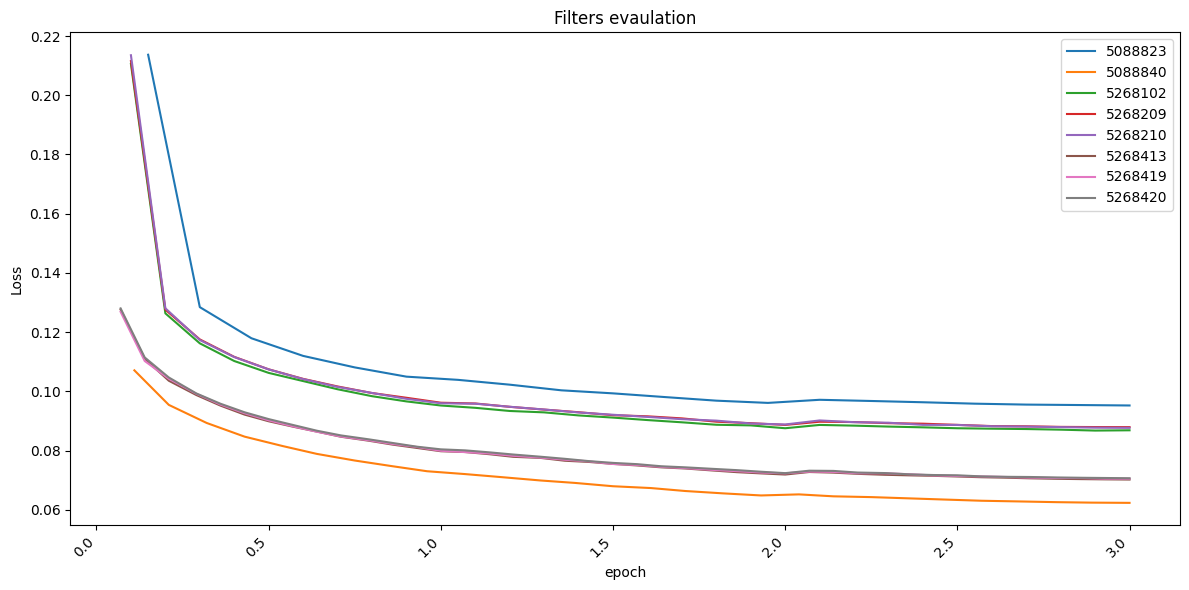

In [13]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.plot(epochs_5088823, evals_5088823, label='5088823')
plt.plot(epochs_5088840, evals_5088840, label='5088840')
plt.plot(epochs_5268102, evals_5268102, label='5268102')
plt.plot(epochs_5268209, evals_5268209, label='5268209')
plt.plot(epochs_5268210, evals_5268210, label='5268210')
plt.plot(epochs_5268413, evals_5268413, label='5268413')
plt.plot(epochs_5268419, evals_5268419, label='5268419')
plt.plot(epochs_5268420, evals_5268420, label='5268420')

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Baseline evaulation')
plt.legend()

# Rotate x-axis text
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed

plt.tight_layout()  # Ensures that labels are not cut off
plt.show()